In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse
from lightgbm import LGBMRegressor

In [2]:
boston = load_boston()
X = boston['data']
y = boston['target']
feature_names = boston.feature_names

X = pd.DataFrame(data=X, columns=feature_names)
X.head(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.9,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.9,9.14


In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train.shape, X_test.shape

((404, 13), (102, 13))

In [4]:
lgbm = LGBMRegressor(random_state=1)
lgbm.fit(X_train, y_train)

LGBMRegressor(random_state=1)

In [5]:
y_hat_test = lgbm.predict(X_test)

# ELI5

https://eli5.readthedocs.io/en/latest/

In [6]:
import eli5

## Global Explanations

In [7]:
eli5.lightgbm.explain_weights_lightgbm(lgbm, importance_type='gain')

Weight,Feature
0.4905,LSTAT
0.3416,RM
0.0378,CRIM
0.0287,DIS
0.0259,PTRATIO
0.0234,INDUS
0.0188,NOX
0.0126,AGE
0.0120,TAX
0.0058,B


In [8]:
eli5.lightgbm.explain_weights_lightgbm(lgbm, importance_type='split')

Weight,Feature
0.1682,LSTAT
0.1547,RM
0.1399,DIS
0.1122,AGE
0.1041,CRIM
0.0831,B
0.0635,PTRATIO
0.0493,NOX
0.0473,INDUS
0.0459,TAX


## Local Explanations

In [9]:
record_to_explain = X_test.iloc[0]

eli5.lightgbm.explain_prediction_lightgbm(lgbm, doc=record_to_explain)

Explanation(estimator='LGBMRegressor(random_state=1)', description='\nFeatures with largest coefficients.\n\nFeature weights are calculated by following decision paths in trees\nof an ensemble. Each leaf has an output score, and expected scores can also be\nassigned to parent nodes. Contribution of one feature on the decision path\nis how much expected score changes from parent to child. Weights of all \nfeatures sum to the output score of the estimator.\n\nCaveats:\n1. Feature weights just show if the feature contributed positively or\n   negatively to the final score, and does not show how increasing or\n   decreasing the feature value will change the prediction.\n2. In some cases, feature weight can be close to zero for an important feature.\n   For example, in a single tree that computes XOR function, the feature at the\n   top of the tree will have zero weight because expected scores for both\n   branches are equal, so decision at the top feature does not change the\n   expected score. For an ensemble predicting XOR functions it might not be\n   a problem, but it is not reliable if most trees happen to choose the same\n   feature at the top.\n', error=None, method='decision paths', is_regression=True, targets=[TargetExplanation(target='y', feature_weights=FeatureWeights(pos=[FeatureWeight(feature='<BIAS>', weight=22.61188123777528, std=None, value=1.0), FeatureWeight(feature='LSTAT', weight=4.078709223010873, std=None, value=7.34), FeatureWeight(feature='INDUS', weight=1.8791985413152459, std=None, value=3.24), FeatureWeight(feature='AGE', weight=0.559398648458683, std=None, value=17.2), FeatureWeight(feature='PTRATIO', weight=0.5561372235334129, std=None, value=16.9), FeatureWeight(feature='NOX', weight=0.19984549606459054, std=None, value=0.46), FeatureWeight(feature='ZN', weight=0.10350861901971077, std=None, value=0.0), FeatureWeight(feature='RAD', weight=0.04597321234957775, std=None, value=4.0), FeatureWeight(feature='CHAS', weight=0.002196178696555195, std=None, value=0.0)], neg=[FeatureWeight(feature='RM', weight=-3.597152031707653, std=None, value=6.333), FeatureWeight(feature='TAX', weight=-0.9391968896876565, std=None, value=430.0), FeatureWeight(feature='CRIM', weight=-0.2737283523504171, std=None, value=0.06724), FeatureWeight(feature='DIS', weight=-0.11103895422320005, std=None, value=5.2146), FeatureWeight(feature='B', weight=-0.10765474885165188, std=None, value=375.21)], pos_remaining=0, neg_remaining=0), proba=None, score=25.00807740340334, weighted_spans=None, heatmap=None)], feature_importances=None, decision_tree=None, highlight_spaces=None, transition_features=None, image=None)

## Permutation Feature Importance

Permutation importances can be computed either on the training set or on a held-out testing or validation set. Using a held-out set makes it possible to highlight which features contribute the most to the generalization power of the inspected model. Features that are important on the training set but not on the held-out set might cause the model to overfit.

In [10]:
def score(model, X, y):
    y_hat = model.predict(X)
    return mse(y, y_hat)

In [11]:
pfi = eli5.sklearn.permutation_importance.PermutationImportance(estimator=lgbm, 
                                                                scoring=score, 
                                                                random_state=1,
                                                                cv='prefit',
                                                                refit=False)

In [12]:
pfi.fit(X_test, y_test)

PermutationImportance(estimator=LGBMRegressor(random_state=1), random_state=1,
                      refit=False,
                      scoring=<function score at 0x00000271F4E251F8>)

In [13]:
pfi.feature_importances_

array([ -2.31087273,   0.04637656,   0.14280947,  -0.20094874,
        -2.44829145, -19.48056132,  -0.85763965,  -2.50838232,
        -0.06920478,  -0.75495878,  -0.06986919,  -0.67439039,
       -30.74398433])

In [14]:
pfi.feature_importances_std_

array([0.38422037, 0.04189966, 0.2986057 , 0.10142742, 0.56765974,
       3.17217943, 0.25776384, 0.78477867, 0.05467349, 0.32016049,
       1.19707638, 0.1917922 , 9.00278865])

In [15]:
from matplotlib import pyplot as plt

<BarContainer object of 13 artists>

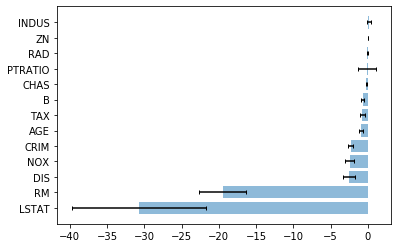

In [16]:
fig, ax = plt.subplots()

sorted_inds = np.argsort(pfi.feature_importances_)
ax.barh(feature_names[sorted_inds], 
        pfi.feature_importances_[sorted_inds], 
        xerr=pfi.feature_importances_std_[sorted_inds], 
        align='center', 
        alpha=0.5,
        capsize=2)

# SHAP

https://shap.readthedocs.io/en/latest/index.html

blog.dominodatalab.com/shap-lime-python-libraries-part-1-great-explainers-pros-cons

The technical definition of a Shapley value is the “average marginal contribution of a feature value over all possible coalitions.” In other words, Shapley values consider all possible predictions for an instance using all possible combinations of inputs. Because of this exhaustive approach, SHAP can guarantee properties like consistency and local accuracy. LIME (Local Interpretable Model-agnostic Explanations) builds sparse linear models around each prediction to explain how the black box model works in that local vicinity. In their NIPS paper, the authors of SHAP show that Shapley values provide the only guarantee of accuracy and consistency and that LIME is actually a subset of SHAP but lacks the same properties.

In [17]:
import shap

In [18]:
explainer = shap.Explainer(lgbm)
shap_values = explainer(X_train)

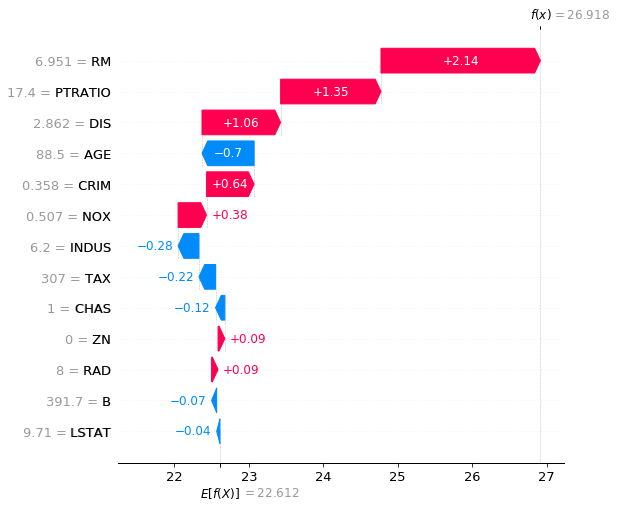

In [19]:
# visualize the first prediction's explanation
shap.plots.waterfall(shap_values[0], max_display=20)

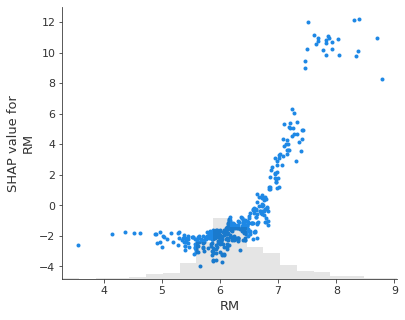

In [20]:
# visualize the impact of changing values in 'RM' columns
shap.plots.scatter(shap_values[:, 'RM'])